                                                    CLASSIFICATION IN MACHINE LEARNING USING
                                                    i)logistic regression(sklearn)
                                                    ii)neural network
                                                    iii)random forest classifier
                                                    

IMPORTING RELEVANT LIBRARIES

In [108]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import tensorflow as tf 
from tensorflow.keras import Sequential,optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

In [109]:
import os
os.chdir(r"C:\Users\HP\Desktop\Absenteeism")
df_preprocessed=pd.read_csv("Absenteeism_preprocessed_data.csv")
df_preprocessed=df_preprocessed.drop('Unnamed: 0',axis=1)

In [110]:
df_preprocessed['Targets']=np.where(df_preprocessed["Absenteeism Time in Hours"]>np.median(df_preprocessed['Absenteeism Time in Hours']),1,0) #define categorical target
df_preprocessed=df_preprocessed.drop("Absenteeism Time in Hours",axis=1) #drop original target as we are only concerned with the binary outcomes
inputs=df_preprocessed.iloc[:,0:14] 

In [111]:

targets=df_preprocessed['Targets']
targets=np.array(targets)
np.unique(targets)

array([0, 1])

In [112]:
print(inputs.shape)
print(targets.shape)

(700, 14)
(700,)


Split the datset into training and testing part

In [113]:
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,train_size=0.85,random_state=10)
print(x_test.shape,x_train.shape ,"\n",y_test.shape,y_train.shape)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.9,random_state=10)
print(x_val.shape,x_train.shape ,"\n",y_val.shape,y_train.shape)
x_train

(105, 14) (595, 14) 
 (105,) (595,)
(60, 14) (535, 14) 
 (60,) (535,)


,reason1,reason2,reason3,reason4,month,week_day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
75,1,0,0,0,10,2,1.036026,0.074838,0.562059,-0.458497,-0.408580,1,1,1
199,1,0,0,0,4,3,-1.016322,-1.209478,-0.379188,1.366488,-0.408580,1,2,0
696,1,0,0,0,5,3,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,1,1,2
213,0,0,0,0,5,3,0.854936,-1.682647,0.405184,2.677510,-0.643782,1,2,0
515,0,0,0,1,10,2,0.040034,-0.263140,-1.320435,0.326336,-0.643782,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,0,0,1,7,5,-0.654143,1.426749,0.248310,-0.806331,1.002633,1,0,0
281,0,0,0,1,9,5,1.036026,0.074838,0.562059,0.560476,-0.408580,1,1,1
360,0,0,0,1,1,1,-1.016322,-1.209478,-0.379188,1.456728,-0.408580,1,2,0
507,1,0,0,0,10,4,1.005844,1.223963,1.973929,0.326336,2.178644,1,0,2


I. USING LOGISTIC REGRESSION 

In [114]:


reg_model=LogisticRegression()
reg_model.fit(x_train,y_train)
print("accuracy:",reg_model.score(x_test,y_test))


accuracy: 0.7428571428571429


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
features=inputs.columns.values
coefficents=reg_model.coef_[0]

df_reg=pd.DataFrame({"features": features,"coef":coefficents})
df_reg=pd.concat([df_reg,pd.DataFrame({"features":"intercept","coef":reg_model.intercept_})],axis=0)
df_reg['abs_coef']=df_reg['coef'].abs()
df_reg=df_reg.sort_values(by="abs_coef",ascending=False)
df_reg=df_reg.drop('abs_coef',axis=1)
df_reg


,features,coef
0,reason1,2.966127
2,reason3,2.959682
0,intercept,-1.684784
3,reason4,1.095586
1,reason2,0.826448
6,Transportation Expense,0.533247
12,Children,0.410194
13,Pets,-0.284627
8,Age,-0.234342
10,Body Mass Index,0.174425


Saving the regression model

In [116]:
file=open('absenteeism_logistic_model','wb')
pickle.dump(reg_model,file)
file.close()

II.USING NEURAL NETWORK

In [138]:

input_size=14
output_size=1


nn_model=Sequential([
    Dense(12,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dense(12,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    
    
    Dense(output_size,activation='sigmoid')])


optimizer=optimizers.Adam()
nn_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics='accuracy')

x_train.shape

(535, 14)

In [139]:

batch_size = 32

max_epochs = 45



# fit the model

history=nn_model.fit(x_train, # train inputs
          y_train, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for 
          validation_data=(x_val, y_val), # validation data
          #verbose = 1 # making sure we get enough information about the training process
          )  

Epoch 1/45
17/17 [==============================] - 1s 16ms/step - loss: 1.7474 - accuracy: 0.4598 - val_loss: 1.2984 - val_accuracy: 0.4667
Epoch 2/45
17/17 [==============================] - 0s 4ms/step - loss: 1.3620 - accuracy: 0.4636 - val_loss: 1.0236 - val_accuracy: 0.4667
Epoch 3/45
17/17 [==============================] - 0s 4ms/step - loss: 1.0568 - accuracy: 0.4617 - val_loss: 0.8369 - val_accuracy: 0.5167
Epoch 4/45
17/17 [==============================] - 0s 4ms/step - loss: 0.8653 - accuracy: 0.4561 - val_loss: 0.7452 - val_accuracy: 0.5333
Epoch 5/45
17/17 [==============================] - 0s 5ms/step - loss: 0.7808 - accuracy: 0.4430 - val_loss: 0.7266 - val_accuracy: 0.4833
Epoch 6/45
17/17 [==============================] - 0s 5ms/step - loss: 0.7505 - accuracy: 0.4766 - val_loss: 0.7160 - val_accuracy: 0.4667
Epoch 7/45
17/17 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.5028 - val_loss: 0.7083 - val_accuracy: 0.4833
Epoch 8/45
17/17 [=

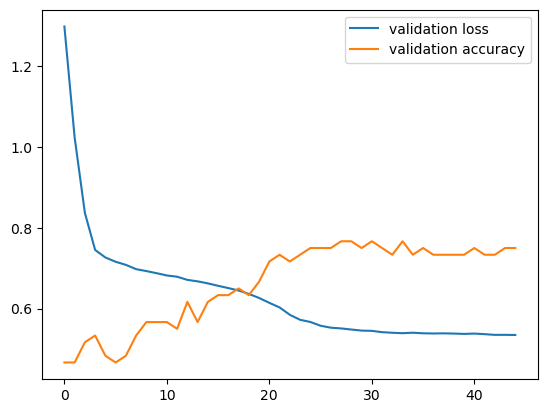

In [140]:
import matplotlib.pyplot as plt
history_dict=history.history
epochs=range(len(history_dict['accuracy']))
plt.plot(epochs,history_dict['val_loss'],label='validation loss')
plt.plot(epochs,history_dict['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [141]:
nn_loss,nn_accuracy=nn_model.evaluate(x_test,y_test)
print("accuracy =",nn_accuracy)



4/4 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7810
accuracy = 0.7809523940086365


III.USING RANDOM FOREST CLASSIFIER

In [123]:

clf=RandomForestClassifier(n_estimators=40,random_state=42)
clf_model=clf.fit(x_train,y_train)
outputs=clf_model.predict(x_test)
#print(outputs)
rf_accuracy_matrix=outputs==y_test
#print(np.array([int(value) for value in rf_accuracy_matrix]))
rf_accuracy=sum(rf_accuracy_matrix)/len(rf_accuracy_matrix)
print("accuracy:",rf_accuracy)

accuracy: 0.780952380952381


Saving the random forest model

Performance of the models

In [122]:
log_report=classification_report(reg_model.predict(x_test),y_test)
nn_report=classification_report((nn_model.predict(x_test)>0.5).astype(int),y_test)
rf_report=classification_report(clf_model.predict(x_test),y_test)
print("\t\t\tClassification reports")
print("\n\n1. logistic regression\n\n", log_report)
print("\n\n2. neural network\n\n", nn_report)
print("\n\n3. random forest classifier\n\n", rf_report)



4/4 [==============================] - 0s 3ms/step
			Classification reports


1. logistic regression

               precision    recall  f1-score   support

           0       0.73      0.82      0.78        57
           1       0.76      0.65      0.70        48

    accuracy                           0.74       105
   macro avg       0.75      0.74      0.74       105
weighted avg       0.74      0.74      0.74       105



2. neural network

               precision    recall  f1-score   support

           0       0.78      0.82      0.80        61
           1       0.73      0.68      0.71        44

    accuracy                           0.76       105
   macro avg       0.76      0.75      0.75       105
weighted avg       0.76      0.76      0.76       105



3. random forest classifier

               precision    recall  f1-score   support

           0       0.77      0.86      0.81        57
           1       0.80      0.69      0.74        48

    accuracy            